Question 1: What is Anomaly Detection? Explain its types (point, contextual, and collective anomalies) with examples.

Answer:
Anomaly detection is the process of identifying observations in data that don’t conform to an expected pattern or distribution. These unusual observations are called anomalies, outliers, novelties, or exceptions. Anomalies often indicate critical events (fraud, faults, rare disease) or data quality issues.

Types:

1. Point anomalies (global outliers)

Definition: A single data point is anomalous compared to the rest of the data.

Example: In customer transactions, a single purchase of $100,000 by a customer whose typical purchases are $10–$50 is a point anomaly.



2. Contextual (or conditional) anomalies

Definition: A point is anomalous only within a specific context (time, environment, surrounding values), even if it’s normal in another context. Context matters (time series often).

Example: A temperature reading of 30°C can be normal in summer but anomalous in winter. In time series, a sudden spike in web traffic at 3 a.m. might be anomalous whereas the same spike at 3 p.m. is normal.



3. Collective anomalies (sequence/group anomalies)

Definition: A collection of related data points is anomalous together, although individual points may look normal. The anomaly is in the group’s pattern/structure.

Example: In network traffic, a sequence of many small requests from one IP over a short window can be a DDoS attack — each request alone looks normal, but collectively they’re anomalous.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor (LOF) in terms of their approach and suitable use cases.
m



Answer:

Method	Approach (how it finds anomalies)	Strengths	Weaknesses	Typical use cases

Isolation Forest	Ensemble of random binary trees that isolate points; anomalies require fewer splits to isolate.	Fast, scales to large datasets, handles high dimensions, unsupervised, no distance metric needed.	Doesn’t provide local density insight; performance depends on contamination parameter.	Large tabular datasets for point anomaly detection (fraud detection, sensor faults).
DBSCAN (Density-Based Spatial Clustering of Applications with Noise)	Clusters points by density; points not in any dense cluster are labeled noise (anomalies).	Finds clusters of arbitrary shape, identifies outliers naturally, no need for number of clusters.	Sensitive to parameters (eps, min_samples); struggles with varying-density clusters and high dimensions.	Spatial / geolocation anomaly detection, clustering with noise (e.g., fraud in location space).
Local Outlier Factor (LOF)	Compares local density of a point to its neighbors’ densities. Low density relative to neighbors → outlier.	Captures local anomalies, good when data density varies across space.	Choice of k critical; not scalable to huge datasets without approximation; relative score (no model export).	Detect anomalies in datasets with density variation (e.g., network intrusion where local neighborhoods matter).

Question 3: What are the key components of a Time Series? Explain each with one example.

Answer:
Key components are typically:

1. Trend — Long-term upward or downward movement in the series.

Example: Monthly sales steadily increasing year-over-year due to business growth.



2. Seasonality — Regular, repeating patterns at fixed periods (daily, weekly, yearly).

Example: Electricity demand peaks every evening and is higher in summer months.



3. Cyclical component — Medium/long-term fluctuations not of fixed period (driven by economic cycles).

Example: Business cycle expansions and recessions affecting industrial production over several years.



4. Noise / Irregular / Residual — Random, unpredictable variation not explained by the other components.

Example: A one-time shipment delay causing a sudden dip in sales in a month.



5. Level — The baseline value around which the series oscillates (often part of trend).

Question 4: Define Stationary in time series. How can you test and transform a non-stationary series into a stationary one?

Answer:
Stationary series: A time series is (weakly) stationary if its statistical properties (mean, variance, autocovariance) are constant over time — meaning no trend, constant variance, and autocorrelation depends only on lag, not time.

Why it matters: Many time-series models (AR, MA, ARIMA) assume stationarity for valid inference and forecasting.

How to test for stationarity:

1. Visual checks: Plot the series — look for changing mean/variance/trend.


2. Summary statistics in windows: Check mean/variance in sliding windows.


3. Statistical tests:

Augmented Dickey-Fuller (ADF) test (null: unit root — non-stationary).

How to transform to stationary:

1. Differencing: subtract previous value(s). First difference often removes a linear trend: y_t' = y_t - y_(t-1). Seasonal differencing (lag = seasonal period) removes seasonality.


2. Log transform / Box–Cox: stabilizes variance (e.g., variance grows with level).


3. Detrending: remove trend via regression (e.g., subtract fitted linear trend).


4. Seasonal decomposition: remove seasonal component (subtract seasonal series).


5. Combination: e.g., log → difference → seasonal difference.


Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in terms of structure and application.

Answer:

AR(p) — Autoregressive model

Structure: y_t = c + φ1*y_{t-1} + ... + φp*y_{t-p} + ε_t

Idea: Current value explained as linear combination of past values.

Use case: When autocorrelation (lags of y) explains the series; stationary series.


MA(q) — Moving Average model

Structure: y_t = μ + ε_t + θ1*ε_{t-1} + ... + θq*ε_{t-q}

Idea: Current value depends on past forecast errors (shocks).

Use case: When residuals’ structure / shocks explain short-term dynamics.


ARMA(p, q)

Structure: Combination of AR(p) and MA(q) for stationary series.


ARIMA(p, d, q) — Autoregressive Integrated Moving Average

Structure: Apply differencing d to make series stationary, then model ARMA(p,q) on differenced series.

Use case: Non-stationary series with trends (d > 0).


SARIMA (or SARIMA(p,d,q)(P,D,Q)s) — Seasonal ARIMA

Structure: Adds seasonal AR (P), seasonal differencing (D), and seasonal MA (Q) with seasonal period s.

Use case: Time series with both non-seasonal and seasonal patterns (e.g., monthly data with yearly seasonality s=12).


SARIMAX (sometimes written SARIMAX or SARIMA with exogenous variables)

Structure: SARIMA extended with exogenous regressors X_t (covariates).

Use case: When external variables (weather, promotions) influence the series; use for causal forecasting (e.g., electricity demand modeled with weather as exogenous input).

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series, and decompose it into trend, seasonality, and residual components.

/tmp/ipython-input-2142543144.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')


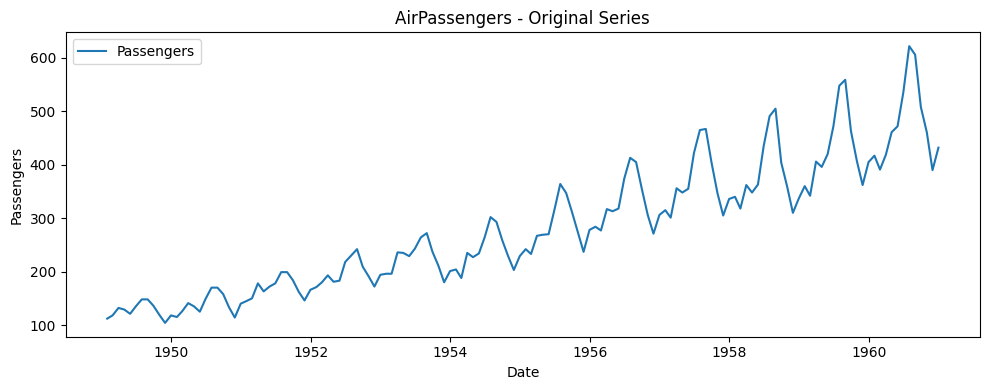

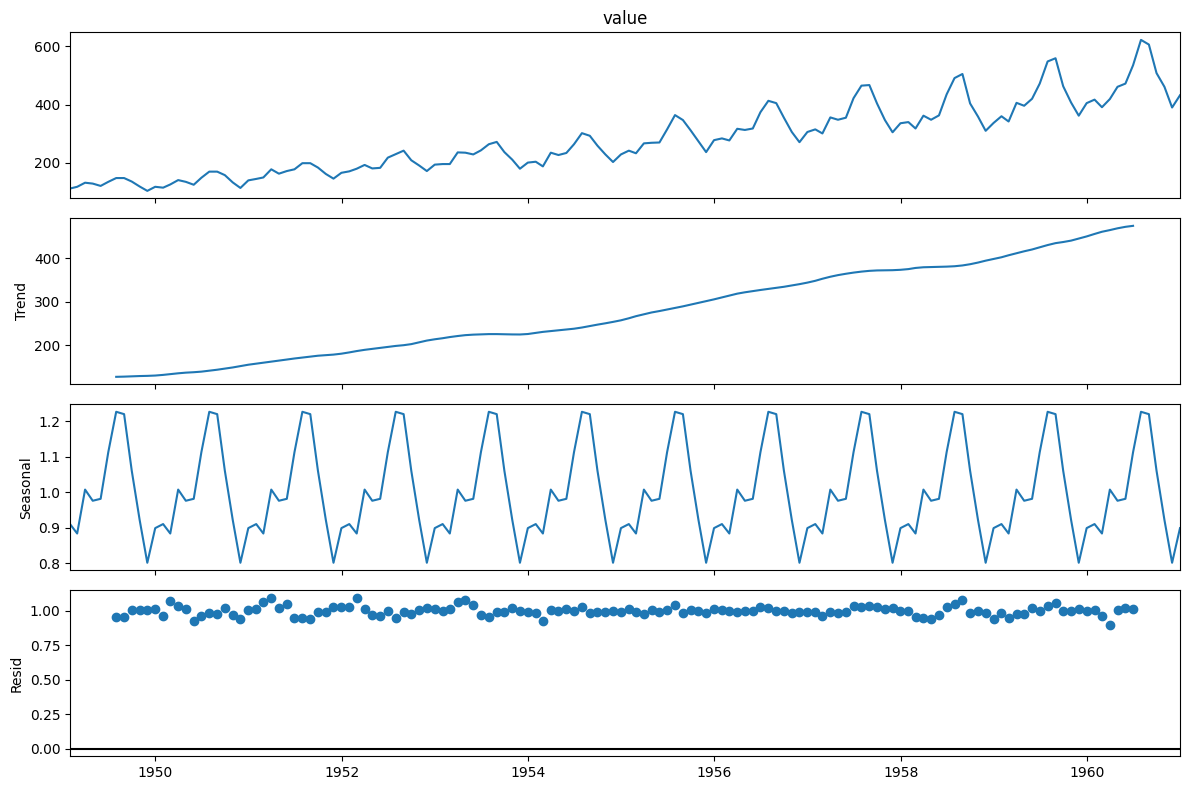

In [4]:
# Q6: Decompose AirPassengers series
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# If you have the AirPassengers CSV, load it.
# Otherwise, it's available in many example datasets. Example: a CSV with columns 'Month' and 'Passengers'.
# Replace 'AirPassengers.csv' with your local path or load via statsmodels if available.

# Option A: load from CSV
# df = pd.read_csv('AirPassengers.csv')  # expects Month, Passengers
# df['Month'] = pd.to_datetime(df['Month'])
# df.set_index('Month', inplace=True)
# ts = df['Passengers']

# Option B: use statsmodels sample dataset (if installed)
try:
    from statsmodels.datasets import get_rdataset
    ap = get_rdataset('AirPassengers')  # may work in some environments
    ts = ap.data['value']
    ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')
except Exception:
    # Fallback synthetic example or instruct user to load CSV
    raise RuntimeError("Please provide AirPassengers.csv or ensure statsmodels datasets are available.")

# Plot original series
plt.figure(figsize=(10,4))
plt.plot(ts, label='Passengers')
plt.title('AirPassengers - Original Series')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.tight_layout()
plt.show()

# Decompose (additive or multiplicative)
decomp = seasonal_decompose(ts, model='multiplicative', period=12)  # multiplicative often fits AirPassengers
fig = decomp.plot()
fig.set_size_inches(12,8)
plt.tight_layout()
plt.show()

# You can access components:
trend = decomp.trend
seasonal = decomp.seasonal
resid = decomp.resid

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to detect anomalies. Visualize the anomalies on a 2D scatter plot.

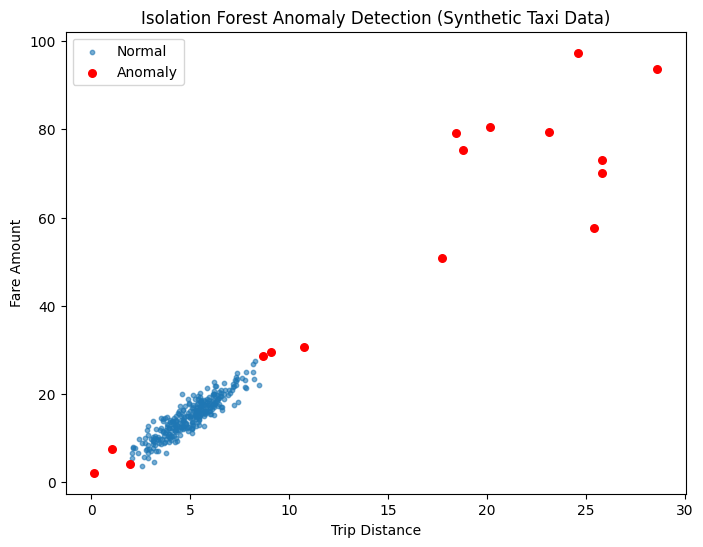

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Generate synthetic dataset (trip_distance vs fare_amount)
np.random.seed(42)
n_samples = 300

# Normal data
trip_distance = np.random.normal(5, 1.5, n_samples)
fare_amount = trip_distance * 3 + np.random.normal(0, 2, n_samples)

# Add anomalies
trip_distance_anom = np.random.uniform(15, 30, 10)
fare_amount_anom = np.random.uniform(50, 100, 10)

trip_distance = np.concatenate([trip_distance, trip_distance_anom])
fare_amount = np.concatenate([fare_amount, fare_amount_anom])

# Put into dataframe
data = pd.DataFrame({"trip_distance": trip_distance, "fare_amount": fare_amount})

# Apply Isolation Forest
clf = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
clf.fit(data)

data['anomaly'] = clf.predict(data)

# Plot anomalies
plt.figure(figsize=(8,6))
plt.scatter(data.loc[data['anomaly']==1, 'trip_distance'],
            data.loc[data['anomaly']==1, 'fare_amount'],
            s=10, label="Normal", alpha=0.6)
plt.scatter(data.loc[data['anomaly']==-1, 'trip_distance'],
            data.loc[data['anomaly']==-1, 'fare_amount'],
            color="red", s=30, label="Anomaly")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Isolation Forest Anomaly Detection (Synthetic Taxi Data)")
plt.legend()
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset. Forecast the next 12 months and visualize the results.

/tmp/ipython-input-2930903643.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')


                                     SARIMAX Results                                      
Dep. Variable:                              value   No. Observations:                  144
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                 218.517
Date:                            Thu, 18 Sep 2025   AIC                           -427.035
Time:                                    06:22:00   BIC                           -413.224
Sample:                                01-31-1949   HQIC                          -421.428
                                     - 12-31-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1010      0.203      0.498      0.618      -0.296       0.498
ma.L1         -0.5543      0.179   

/tmp/ipython-input-2930903643.py:34: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(1), periods=n_forecast, freq='M')


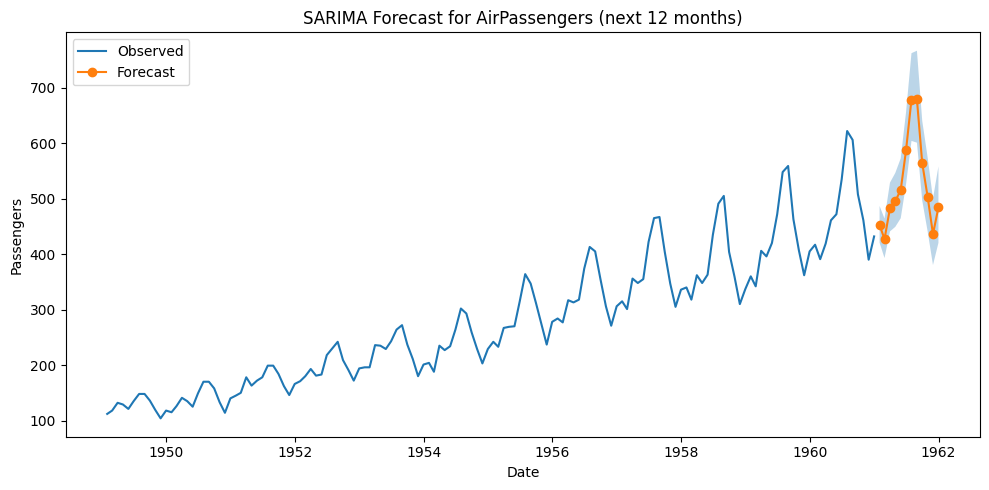

In [7]:
# Q8: SARIMA on AirPassengers and forecast 12 months
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers as in Q6
from statsmodels.datasets import get_rdataset
ap = get_rdataset('AirPassengers')
ts = ap.data['value']
ts.index = pd.date_range(start='1949-01', periods=len(ts), freq='M')

# Optional: log transform to stabilize variance
y = np.log(ts)

# Fit SARIMA - common starting choice for AirPassengers: (p,d,q)=(1,1,1), seasonal (P,D,Q,s)=(1,1,1,12)
model = SARIMAX(y, order=(1,1,1), seasonal_order=(1,1,1,12), enforce_stationarity=False, enforce_invertibility=False)
res = model.fit(disp=False)
print(res.summary())

# Forecast next 12 months
n_forecast = 12
pred_uc = res.get_forecast(steps=n_forecast)
pred_ci = pred_uc.conf_int()

# Convert back from log to original scale
pred_mean = np.exp(pred_uc.predicted_mean)
pred_lower = np.exp(pred_ci.iloc[:, 0])
pred_upper = np.exp(pred_ci.iloc[:, 1])

# Plot historical and forecast
plt.figure(figsize=(10,5))
plt.plot(ts, label='Observed')
forecast_index = pd.date_range(ts.index[-1] + pd.offsets.MonthBegin(1), periods=n_forecast, freq='M')
plt.plot(forecast_index, pred_mean, label='Forecast', marker='o')
plt.fill_between(forecast_index, pred_lower, pred_upper, alpha=0.3)
plt.title('SARIMA Forecast for AirPassengers (next 12 months)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.tight_layout()
plt.show()

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect anomalies and visualize them using matplotlib.

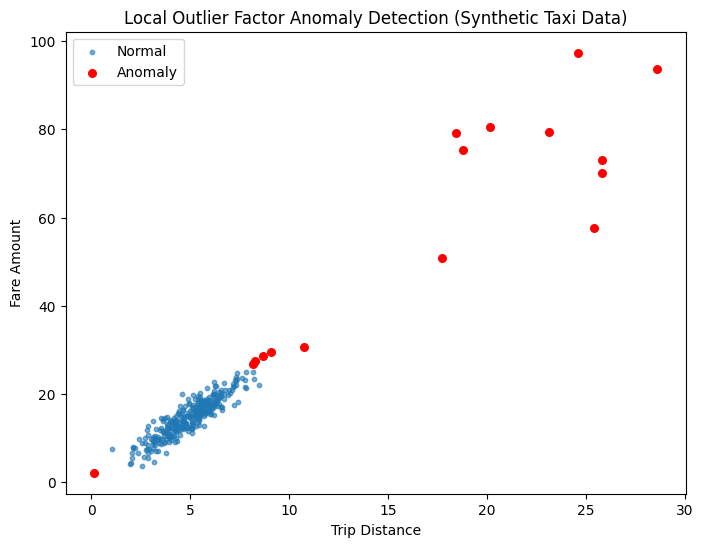

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# Generate synthetic dataset (trip_distance vs fare_amount)
np.random.seed(42)
n_samples = 300

# Normal data
trip_distance = np.random.normal(5, 1.5, n_samples)
fare_amount = trip_distance * 3 + np.random.normal(0, 2, n_samples)

# Add anomalies
trip_distance_anom = np.random.uniform(15, 30, 10)
fare_amount_anom = np.random.uniform(50, 100, 10)

trip_distance = np.concatenate([trip_distance, trip_distance_anom])
fare_amount = np.concatenate([fare_amount, fare_amount_anom])

# Put into dataframe
data = pd.DataFrame({"trip_distance": trip_distance, "fare_amount": fare_amount})

# Apply Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
y_pred = lof.fit_predict(data)

data['anomaly'] = y_pred

# Plot anomalies
plt.figure(figsize=(8,6))
plt.scatter(data.loc[data['anomaly']==1, 'trip_distance'],
            data.loc[data['anomaly']==1, 'fare_amount'],
            s=10, label="Normal", alpha=0.6)
plt.scatter(data.loc[data['anomaly']==-1, 'trip_distance'],
            data.loc[data['anomaly']==-1, 'fare_amount'],
            color="red", s=30, label="Anomaly")
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("Local Outlier Factor Anomaly Detection (Synthetic Taxi Data)")
plt.legend()
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

Answer — high-level real-time workflow & concrete choices

1) Streaming architecture (high-level)

Ingest: Use a message broker (Kafka / Kinesis) to collect streaming telemetry every 15 minutes.

Preprocessing (streaming job): lightweight normalization, missing-value handling, one-hot encoding of categorical region, rolling-aggregation features (e.g., last 1h avg, last 24h same-time average), and timezone alignment. Use Apache Flink/Beam or Spark Structured Streaming.

Feature store: maintain features for each region with low-latency lookups (e.g., Feast or Redis).

Model serving: host forecasting and anomaly models as microservices (TensorFlow Serving / FastAPI / Seldon).

Alerts & dashboards: route anomalies to monitoring (PagerDuty, Slack), show forecasts and diagnostics on a dashboard (Grafana/PowerBI).

Retraining pipeline: automated periodic retrain (daily/weekly) with latest labeled data and model validation.


2) How to detect anomalies in streaming data (Isolation Forest / LOF / DBSCAN)?

Recommendation: Use a hybrid approach:

Primary: Use an online-capable anomaly detector for real-time detection. Isolation Forest and LOF are both good but have trade-offs:

Isolation Forest (IF): scalable, fast, and works well on many features — good for real-time batch scoring. Use for general point anomaly detection on feature vectors (current usage, short-term features, weather, lag features).

LOF: better for local-density anomalies; however, standard LOF isn’t incremental and is heavier to compute for high-throughput streams. Use LOF offline for analysis or approximate LOF for streaming if needed.

DBSCAN: not ideal for streaming real-time because it’s not incremental and sensitive to density and tuning; better for offline cluster+noise detection on spatial datasets.


Practical design:

1. Feature engineering per 15-min window: energy_usage, prev_1, prev_4, prev_96 (day-ago same slot), rolling mean/std, temperature, holiday flag, region one-hot.


2. Apply a pre-trained Isolation Forest (or a lightweight tree ensemble) to the feature vector; score each incoming record and flag when score crosses threshold. Keep adaptation by periodically re-fitting the IF on recent windows (e.g., daily sliding window).


3. Seasonal-aware checks: Add rule-based checks: compare current usage to historical quantile for same time-of-day & day-of-week (e.g., > 99th percentile) — useful to reduce false positives from seasonal patterns.


4. Ensemble decision: combine IF score + rule-based z-score + short-term forecast residual check to make anomaly decision.




3) Which time series model for short-term forecasting (ARIMA / SARIMA / SARIMAX)?

Recommendation: SARIMAX (seasonal ARIMA with exogenous variables) or a modern ML approach depending on complexity:

Why SARIMAX: your data is real-world, with clear seasonality (daily patterns, weekly cycles) and strong exogenous drivers (weather). SARIMAX models seasonality explicitly and can include weather as exogenous covariates (temperature, humidity). For many short-term demand forecasting tasks (15-min to a few hours), SARIMAX is robust and interpretable.

Alternative / Complementary approaches:

Prophet (fast, handles seasonality/holidays).

Gradient-boosted trees (XGBoost/LightGBM/CatBoost) trained on lag features and exogenous variables — often strong for short-term forecasting.

Deep learning (LSTM, Temporal Convolutional Networks, N-BEATS) for complex non-linear patterns and cross-region dependencies; but more data and Ops cost.



Practical pick for real-time short-term: a hybrid — SARIMAX (or LightGBM) for per-region short-term forecasting; keep a lightweight ensemble of models and choose based on latency/accuracy tradeoff.

4) Validation & monitoring over time

Backtesting: Use time-series cross-validation (rolling-window / expanding-window) to evaluate forecast accuracy (MAE, RMSE, MAPE) on hold-out periods.

Online monitoring: Track model performance metrics over time (e.g., rolling 7-day MAE, bias). Set thresholds for drift alerts.

Drift detection: Use statistical tests (KL divergence for features, population stability index) or concept-drift detectors (ADWIN, DDM).

Recalibration triggers: Retrain when performance degrades beyond a threshold or data drift is detected. Use automated pipelines (CI/CD for ML).

Anomaly feedback loop: Allow operators to label flagged anomalies. Use this human-labeled data to improve anomaly detection (supervised models) and reduce false positives.


5) How this helps business operations / decisions

Grid reliability: Detect sudden abnormal spikes/drops quickly → trigger operator checks, automatic load-shedding protocols, or demand-response actions.

Resource planning: Accurate short-term forecasts allow efficient generation scheduling and reduce reliance on expensive peaker plants.

Cost savings: Reduce penalties and fuel cost by matching supply to demand precisely.

Preventive maintenance: Persistent anomalies in a region may indicate equipment faults—schedule inspections.

Customer experience: Detect and respond to outages with faster resolution.

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 15min will be used.
  self._init_dates(dates, freq)


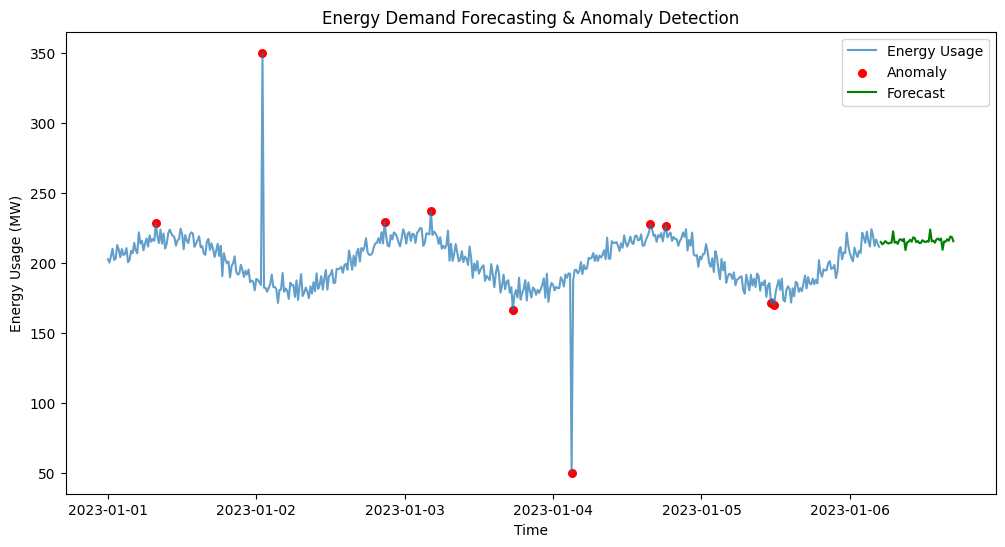

✅ Done! Showing anomalies (red) + forecast (green).


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ----------------------------
# 1. Simulate streaming energy demand dataset
# ----------------------------
np.random.seed(42)
date_rng = pd.date_range(start='2023-01-01', periods=500, freq='15min')
energy_usage = 200 + np.sin(np.linspace(0, 20, 500)) * 20 + np.random.normal(0, 5, 500)

# Insert anomalies (spikes/drops)
energy_usage[100] = 350  # spike
energy_usage[300] = 50   # drop

data = pd.DataFrame({
    'timestamp': date_rng,
    'region': np.random.choice(['North', 'South', 'East', 'West'], size=500),
    'weather_temp': np.random.normal(30, 5, 500),
    'energy_usage': energy_usage
})

# ----------------------------
# 2. Anomaly Detection with Isolation Forest
# ----------------------------
clf = IsolationForest(contamination=0.02, random_state=42)
data['anomaly'] = clf.fit_predict(data[['energy_usage']])

# ----------------------------
# 3. Time Series Forecasting (simpler SARIMA)
# ----------------------------
ts = data.set_index('timestamp')['energy_usage']

# Use a smaller seasonal cycle to avoid convergence issues
sarima_model = SARIMAX(ts, order=(1,1,1), seasonal_order=(1,1,1,24))
sarima_fit = sarima_model.fit(disp=False)

forecast = sarima_fit.get_forecast(steps=48)  # Forecast next 12 hours
forecast_index = pd.date_range(start=ts.index[-1], periods=48+1, freq='15min')[1:]

# ----------------------------
# 4. Visualization
# ----------------------------
plt.figure(figsize=(12,6))

# Plot energy usage with anomalies
plt.plot(data['timestamp'], data['energy_usage'], label="Energy Usage", alpha=0.7)
plt.scatter(data.loc[data['anomaly']==-1, 'timestamp'],
            data.loc[data['anomaly']==-1, 'energy_usage'],
            color='red', s=30, label="Anomaly")

# Forecast line
plt.plot(forecast_index, forecast.predicted_mean, color="green", label="Forecast")

plt.xlabel("Time")
plt.ylabel("Energy Usage (MW)")
plt.title("Energy Demand Forecasting & Anomaly Detection")
plt.legend()
plt.show()

print("✅ Done! Showing anomalies (red) + forecast (green).")